# Advanced Exercise Project Manual Neural Networks 2

This code was a very detailed and interesting example of how to build a simple neural network from scratch. This model only had one neuron and was used for a regression task, which measn that the goal was to predict continuous values.

This notebook showed how a simple neural network with one neuron can learn using gradient descent. The model predicted values based on two inputs and was trained using mean squared error over 10,000 iterations. I saw that the RMSE got smaller during training, and the weights and bias slowly adjusted to improve predictions. The model eventually predicted values close to the real targets: [3, 5, 10].

The training process was visualized with graphs how the weights, bias, and error changed over time. This helped me understand how learning happens gradually.

Overall, this notebook helpful to me understanding how a neural network learns by adjusting weights and minimizing error step by step.

[Digging deep into Neural networks: Manual Implementation](https://medium.com/@anushruthikae/digging-deep-into-neural-networks-manual-impleme-859903512df5)

## Takeaways from Manual Neural Networks


**Neural networks are just math**
Everything that happens inside the network can be described using dot products, summations, and gradients. It was helpful to see this written out step by step.

**Gradient descent is kinda slow but works**
In the this second notebook, I saw the weights getting better over 10,000 steps. It made me realize how training works in practice and why learning rate matters so much.

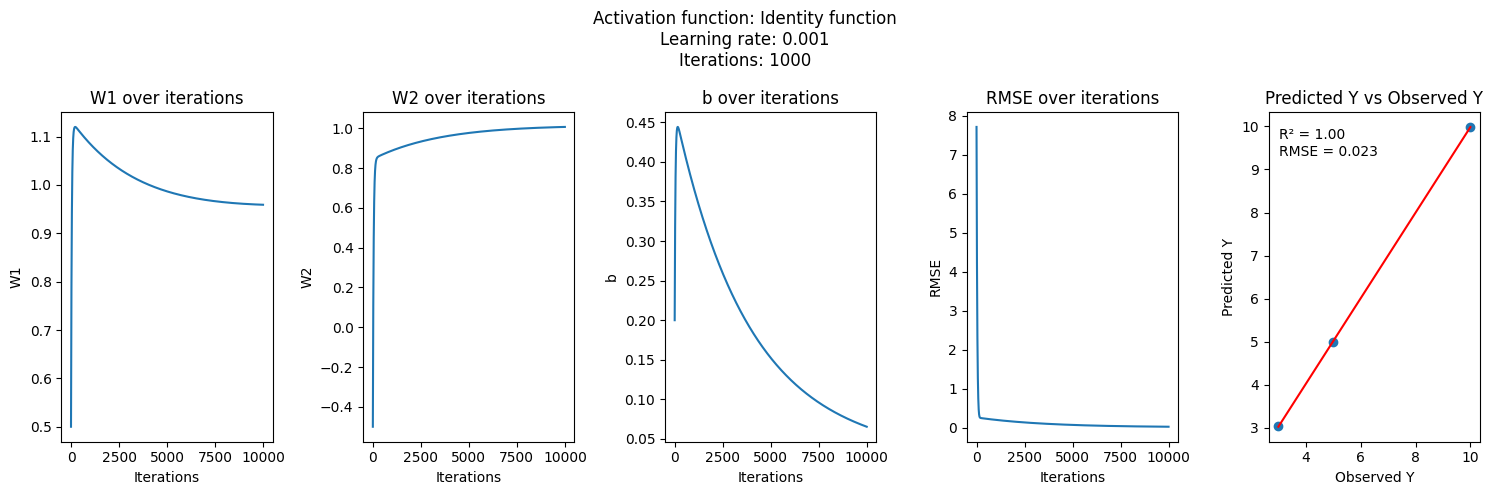

In [ ]:
%reset -f
# ANN model using backpropagation as a learning algorithm
# The ANN is composed of one hidden layer with one formal neuron with 2 input and 1 output variables

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Activation function : identity function
def activ_func(x):
    return x

# Derivative of the identity activation function
def activ_func_derivative(x):
    return 1

# dataset
X1 = np.array([1, 2, 3])
X2 = np.array([2, 3, 7])
Y_true = np.array([3, 5, 10])

# Initialize weights and bias
w1 = 0.5
w2 = -0.5
b = 0.2
# Learning rate
lr = 0.001 # Must be small enough to converge - Many lr values can be tested

# Number of iterations for gradient descent
iterations = 10000 # Many iterations can be tested

# DataFrame to store the values

df1 = pd.DataFrame(columns=['dw1', 'dw2', 'db', 'w1', 'w2', 'b'])

# dw and db are the derivatives of loss function with respect to w and b respectively
# w and b are the weights and bias respectively

df2 = pd.DataFrame(columns=['loss','Z', 'Y_pred','dZ','RMSE'])
# loss, Z, Y_pred, dZ, RMSE : are the loss, weighted sum, dZ, predicted output and root mean square error respectively
# dZ is the derivative of loss function with respect to Z
# Single layer model
def single_layer_model(X1, X2, w1, w2, b):
    Z = w1*X1 + w2*X2 + b
    Y_pred = activ_func(Z)
    return Y_pred, Z

for i in range(iterations):

    # Forward propagation
    Y_pred, Z = single_layer_model(X1, X2, w1, w2, b)

    # Calculate the loss
    loss = (1/6)*np.sum((Y_true - Y_pred)**2)
    ## Note that loss is divided by 2 to make the derivation simpler
    ## For RMSE, loss is multiplied by 2 and then square rooted to get the RMSE usually used in regression problems
    RMSE = np.sqrt(loss*2)

    # Backward propagation

    dZ = (Y_pred - Y_true) * activ_func_derivative(Z)

    dw1 = np.mean(dZ * X1)
    dw2 = np.mean(dZ * X2)
    db = np.mean(dZ)

    # Update weights and bias
    w1 -= lr * dw1
    w2 -= lr * dw2
    b -= lr * db

    # Store the values in the DataFrame
    df1.loc[i] = [dw1, dw2, db, w1, w2, b]
    df2.loc[i] = [loss, Z, Y_pred, dZ, RMSE]

# Plots
## Add initialization values to the DataFrame df1 - for plotting purposes
init_values = [0, 0, 0, 0.5, -0.5, 0.2]
df_init = pd.DataFrame([init_values])
df_init.columns = df1.columns
# Concatenate df_init and df1
df1 = pd.concat([df_init, df1]).reset_index(drop=True)
# Plots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # Create 5 subplots on one line

# Plot w1
axs[0].plot(range(iterations+1), df1['w1'])
axs[0].set_title('W1 over iterations')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('W1')

# Plot w2
axs[1].plot(range(iterations+1), df1['w2'])
axs[1].set_title('W2 over iterations')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('W2')

# Plot b
axs[2].plot(range(iterations+1), df1['b'])
axs[2].set_title('b over iterations')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('b')
# Plot RMSE
axs[3].plot(range(iterations), df2['RMSE'])
axs[3].set_title('RMSE over iterations')
axs[3].set_xlabel('Iterations')
axs[3].set_ylabel('RMSE')

# Plot Y_true vs Y_pred (get last values of Y_pred at the last iteration)
Y_pred_final = df2['Y_pred'].tail(1).values[0]
Y_true=np.array([3, 5, 10])
axs[4].scatter(Y_true, Y_pred_final)
axs[4].set_title('Predicted Y vs Observed Y')
axs[4].set_xlabel('Observed Y')
axs[4].set_ylabel('Predicted Y')

# Calculate linear regression between predicted and observed Y
slope, intercept = np.polyfit(Y_true, Y_pred_final, 1)

# Plot regression line
x = np.array([min(Y_true), max(Y_true)])
y = slope * x + intercept
axs[4].plot(x, y, color='red')

# Calculate R² and RMSE
r2 = r2_score(Y_true, Y_pred_final)
rmse = np.sqrt(mean_squared_error(Y_true, Y_pred_final))

# Show R² and RMSE on the plot
axs[4].text(0.05, 0.95, f'R² = {r2:.2f}\nRMSE = {rmse:.3f}', transform=axs[4].transAxes, verticalalignment='top')

# Set a common title for all subplots
fig.suptitle("Activation function: Identity function\nLearning rate: 0.001\nIterations: 1000")
plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()